In [3]:
pip install pystan==2.19.1.1 prophet

  Running setup.py clean for prophet

  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730983 sha256=7d3e49b7dda970873d3cd20229508ed08dbab9de7a3e10087bbfc118d3419589
  Stored in directory: c:\users\vikki\appdata\local\pip\cache\wheels\a0\8b\b2\810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus
Failed to build prophet
    Running setup.py install for prophet: started
    Running setup.py install for prophet: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Vikki\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Vikki\\AppData\\Local\\Temp\\pip-install-rkdmwslg\\prophet_6806a75144164f16afed96b455bf7f4b\\setup.py'"'"'; __file__='"'"'C:\\Users\\Vikki\\AppData\\Local\\Temp\\pip-install-rkdmwslg\\prophet_6806a75144164f16afed96b455bf7f4b\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Vikki\AppData\Local\Temp\pip-wheel-2gp89iz0'
       cwd: C:\Users\Vikki\AppData\Local\Temp\pip-install-rkdmwslg\prophet_6806a75144164f16afed96b455bf7f4b\
  Complete output (52 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\prophet
  creating build\lib\prophet\stan_model
  Traceback (most recent call last):
    File "<string>"

In [4]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
#os.chdir('data')
from colorsetup import colors, palette
sns.set_palette(palette)
import warnings
warnings.simplefilter(action='ignore')
import fbprophet
import pmdarima as pm


            [
                F=stan::math::internal::positive_ordered_constrain_op
            ]
    C:\Users\Vikki\anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/rev/mat/fun/positive_ordered_constrain.hpp(86): error C2440: 'return': cannot convert from 'void' to 'Eigen::Matrix<stan::math::var,-1,1,0,-1,1>'
    C:\Users\Vikki\anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/rev/mat/fun/positive_ordered_constrain.hpp(86): note: Expressions of type void cannot be converted to other types
    C:\Users\Vikki\anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/rev/mat/functor/adj_jac_apply.hpp(410): error C2660: 'stan::math::adj_jac_vari<F,Eigen::Matrix<stan::math::var,-1,1,0,-1,1>>::count_memory': function does not take 2 arguments
            with
            [
                F=stan::math::internal::simplex_constrain_op
            ]
    C:\Users\Vikki\anaconda3\lib\site-packages\pystan\stan\lib\stan_math\stan/math/rev/mat/functor/adj_jac_app

ModuleNotFoundError: No module named 'fbprophet'

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
# create a play dataframe from 1-10 (linear and squared) to test how differencing works
play = pd.DataFrame([[x for x in range(1,11)], [x**2 for x in range(1,11)]]).T
play.columns = ['original', 'squared']
play

,original,squared
0,1,1
1,2,4
2,3,9
3,4,16
4,5,25
5,6,36
6,7,49
7,8,64
8,9,81
9,10,100


In [9]:
play.original.diff()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
7    1.0
8    1.0
9    1.0
Name: original, dtype: float64

Text(0.5, 1.0, 'second diff')

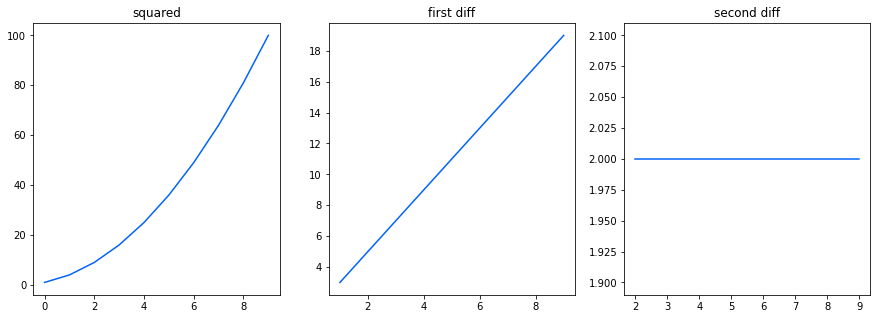

In [10]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
axes[0].plot(play.squared)
axes[0].set_title('squared')
axes[1].plot(play.squared.diff())
axes[1].set_title('first diff')
axes[2].plot(play.squared.diff().diff())
axes[2].set_title('second diff')

In [12]:
play.squared.diff().diff()

0    NaN
1    NaN
2    2.0
3    2.0
4    2.0
5    2.0
6    2.0
7    2.0
8    2.0
9    2.0
Name: squared, dtype: float64

Text(0.5, 1.0, 'log')

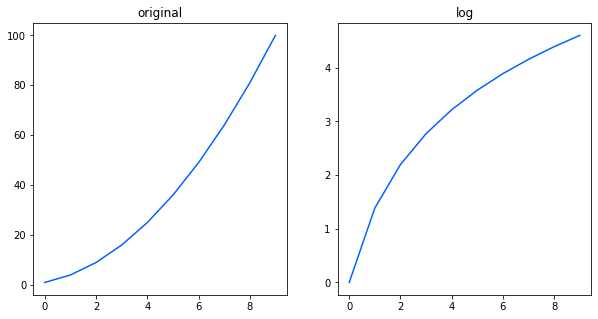

In [13]:
fig,axes = plt.subplots(1,2,figsize = (10,5))
axes[0].plot(play.squared)
axes[0].set_title('original')
axes[1].plot(np.log(play.squared))
axes[1].set_title('log')

In [14]:
# load data and convert to datetime
monthly_temp = pd.read_csv('./mean-monthly-temperature-1907-19.csv', 
                           skipfooter=2, 
                           infer_datetime_format=True, 
                           header=0, 
                           index_col=0, engine='python',
                           names=['month', 'temp'])

monthly_temp.index = pd.to_datetime(monthly_temp.index)

In [15]:
monthly_temp.head()

,temp
month,
1907-01-01,33.3
1907-02-01,46.0
1907-03-01,43.0
1907-04-01,55.0
1907-05-01,51.8


In [16]:
# describe
monthly_temp.describe()

,temp
count,792.000000
mean,53.553662
std,15.815452
min,11.200000
25%,39.675000
50%,52.150000
75%,67.200000
max,82.400000


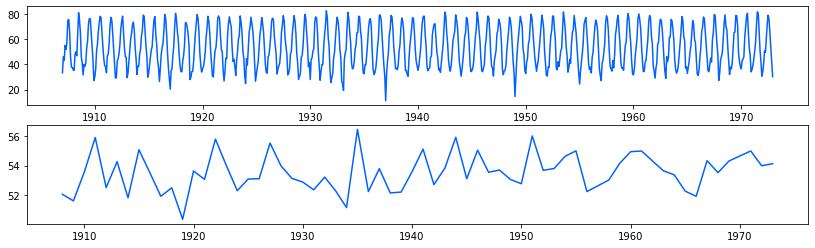

In [17]:
# resample to annual and plot each
plt.rcParams['figure.figsize'] = [14, 4]
annual_temp = monthly_temp.resample('A').mean()
fig, axes = plt.subplots(2,1)
axes[0].plot(monthly_temp)
axes[1].plot(annual_temp)

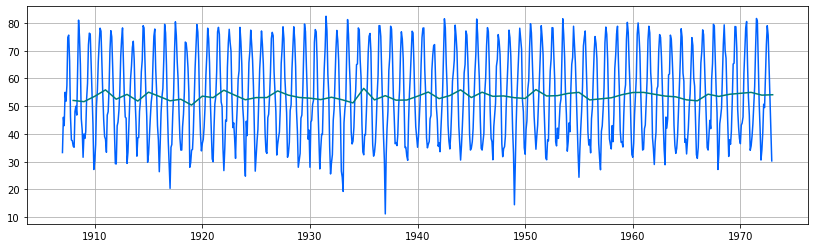

In [25]:
# plot both on same figure
plt.plot(monthly_temp)
plt.plot(annual_temp)
plt.grid(b=True);

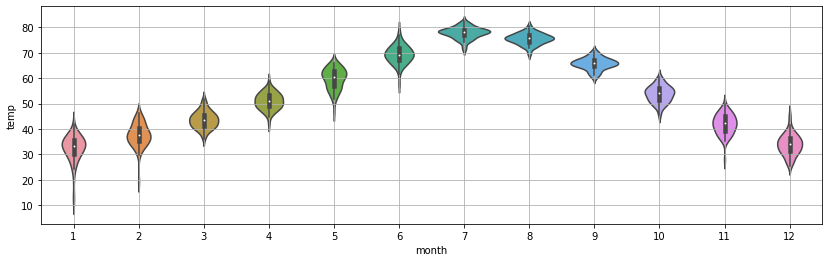

In [28]:
# violinplot of months to determine variance and range
sns.violinplot(x=monthly_temp.index.month, y=monthly_temp.temp)
plt.grid(b=True);

In [29]:
# split data into 10 chunks
chunks = np.split(monthly_temp.temp, indices_or_sections=12)

In [30]:
mean_vals = np.mean(chunks,axis=1)
var_vals = np.var(chunks,axis=1)
vals = {'mean_vals': mean_vals , 'var_vals': var_vals}
mean_var = pd.DataFrame(vals)
mean_var

,mean_vals,var_vals
0,52.674242,225.907973
1,53.654545,246.031570
2,52.837879,247.400838
3,54.078788,250.787429
4,52.439394,277.865721
5,53.457576,283.619412
6,53.718182,224.882397
7,54.422727,265.442059
8,53.457576,238.561230
9,54.425758,257.425852


In [34]:
monthly_temp.temp

month
1907-01-01    33.3
1907-02-01    46.0
1907-03-01    43.0
1907-04-01    55.0
1907-05-01    51.8
              ... 
1972-08-01    75.6
1972-09-01    64.1
1972-10-01    51.7
1972-11-01    40.3
1972-12-01    30.3
Name: temp, Length: 792, dtype: float64

In [35]:
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic         -6.481466e+00
p-value                 1.291867e-08
Lags Used               2.100000e+01
Observations Used       7.700000e+02
Critical Value (1%)    -3.438871e+00
Critical Value (5%)    -2.865301e+00
Critical Value (10%)   -2.568773e+00
dtype: float64


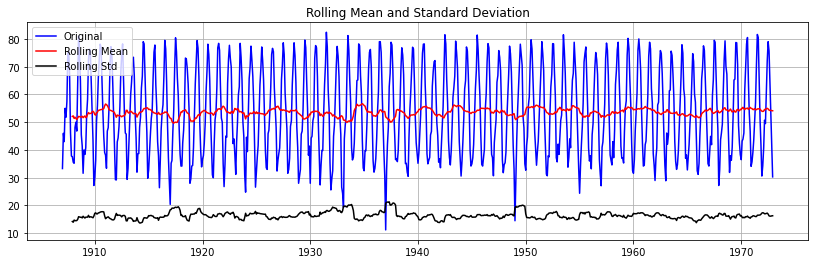

In [36]:
# run DFT on monthly
dftest(monthly_temp.temp)
# p-value allows us to reject a unit root: data is stationary

Test Statistic         -7.878242e+00
p-value                 4.779473e-12
Lags Used               0.000000e+00
Observations Used       6.500000e+01
Critical Value (1%)    -3.535217e+00
Critical Value (5%)    -2.907154e+00
Critical Value (10%)   -2.591103e+00
dtype: float64


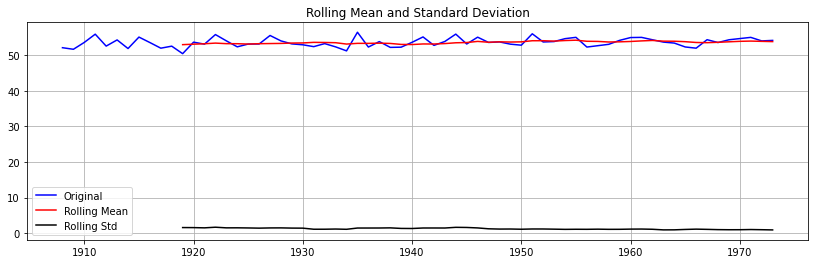

In [37]:
# run DFT on annual
dftest(annual_temp.temp)

Test Statistic          -0.449458
p-value                  0.901508
Lags Used               10.000000
Observations Used       55.000000
Critical Value (1%)     -3.555273
Critical Value (5%)     -2.915731
Critical Value (10%)    -2.595670
dtype: float64


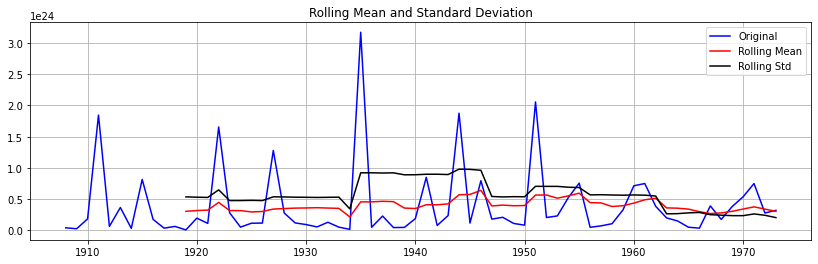

In [38]:
# here's an example of non-stationary with DFT results
dftest(np.exp(annual_temp.temp))

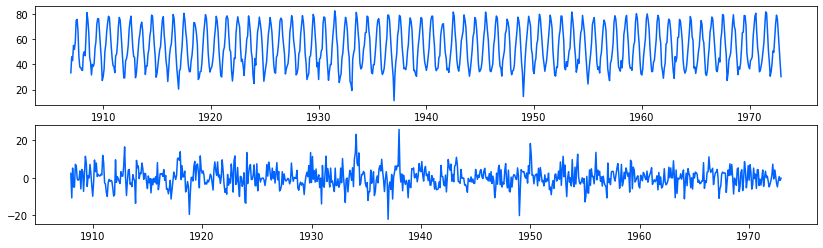

In [39]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
monthly_temp['lag_12'] = monthly_temp.shift(12)
monthly_temp['seasonal_diff'] = monthly_temp.temp - monthly_temp['lag_12']

fig,axes = plt.subplots(2,1)
axes[0].plot(monthly_temp.temp,label ='original')
axes[1].plot(monthly_temp.seasonal_diff,label = 'seasonal diff')

In [45]:
pip install pmdarima

  Using cached pmdarima-1.8.5-cp38-cp38-win_amd64.whl (602 kB)
Note: you may need to restart the kernel to use updated packages.


In [48]:
# To install the library

  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(monthly_temp.temp, start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 24,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=7.04 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=4713.297, Time=0.08 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=4463.166, Time=2.24 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=5.87 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=4711.431, Time=0.06 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=4691.944, Time=0.32 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=4376.186, Time=9.86 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=31.27 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=6.17 sec
 ARIMA(0,0,0)(2,1,0)[24] intercept   : AIC=4403.064, Time=10.49 sec
 ARIMA(2,0,0)(2,1,0)[24] intercept   : AIC=4375.310, Time=10.90 sec
 ARIMA(2,0,0)(1,1,0)[24] intercept   : AIC=4463.521, Time=2.35 sec
 ARIMA(2,0,0)(2,1,1)[24] intercept   : AIC=inf, Time=37.58 sec
 ARIMA(2,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=10.06 sec
 ARIMA(3,0,0)(2,1,0)[24] intercept   : AIC=4

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  792
Model:             SARIMAX(3, 0, 0)x(2, 1, 0, 24)   Log Likelihood               -2178.930
Date:                            Sat, 02 Apr 2022   AIC                           4369.860
Time:                                    01:26:15   BIC                           4397.723
Sample:                                         0   HQIC                          4380.584
                                            - 792                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1758      0.034      5.229      0.000       0.110       0.242
ar.L2          0.0463      0.038      1.234      0.217      -0.027       0.120
ar.L3          0.0857      0.039      2.192      0.028       0.009       0.162
ar.S.L24      -0.7061      0.030    -23.525      0.000      -0.765      -0.647
ar.S.L48      -0.3463      0.032    -10.681      0.000      -0.410      -0.283
sigma2        16.7486      0.645     25.972      0.000      15.485      18.013
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               102.44
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                            -0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""